In [17]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
bitcoin = pd.read_csv('Bitcoin.csv')
etherium = pd.read_csv('Etherium.csv')
renBTC = pd.read_csv('renBTC.csv')

In [19]:
bitcoin.head()

,Unnamed: 0,timeOpen,timeClose,timeHigh,timeLow,quote.open,quote.high,quote.low,quote.close,quote.volume,quote.marketCap,quote.timestamp
0,0,2020-07-22T00:00:00.000Z,2020-07-22T23:59:59.999Z,2020-07-22T23:55:01.000Z,2020-07-22T08:04:01.000Z,9375.080464,9530.519009,9319.653395,9525.363450,1.653225e+10,1.756448e+11,2020-07-22T23:59:59.999Z
1,1,2020-07-30T00:00:00.000Z,2020-07-30T23:59:59.999Z,2020-07-30T23:06:02.000Z,2020-07-30T13:07:01.000Z,11099.832891,11169.356669,10895.455406,11111.214290,2.285725e+10,2.049690e+11,2020-07-30T23:59:59.999Z
2,2,2020-08-08T00:00:00.000Z,2020-08-08T23:59:59.999Z,2020-08-08T12:18:00.000Z,2020-08-08T05:25:00.000Z,11604.553348,11800.064851,11558.431632,11754.045814,1.757206e+10,2.169241e+11,2020-08-08T23:59:59.999Z
3,3,2020-08-17T00:00:00.000Z,2020-08-17T23:59:59.999Z,2020-08-17T16:05:00.000Z,2020-08-17T06:09:00.000Z,11895.657774,12359.057022,11806.695882,12254.401908,2.822769e+10,2.262617e+11,2020-08-17T23:59:59.999Z
4,4,2020-08-26T00:00:00.000Z,2020-08-26T23:59:59.999Z,2020-08-26T16:41:01.000Z,2020-08-26T00:51:00.000Z,11366.894933,11530.053066,11296.993373,11488.363490,2.246666e+10,2.122105e+11,2020-08-26T23:59:59.999Z


In [20]:
bitcoin['quote.close'].describe()

count      100.000000
mean     33854.679501
std      15747.170219
min       9525.363450
25%      19540.266219
50%      34516.633296
75%      46408.096471
max      64949.961915
Name: quote.close, dtype: float64

In [21]:
etherium['quote.close'].describe()

count     100.000000
mean     2056.500472
std      1197.934686
min       262.190656
25%      1227.856222
50%      1854.838954
75%      3008.606785
max      4730.384039
Name: quote.close, dtype: float64

In [22]:
renBTC['quote.close'].describe()

count      100.000000
mean     33829.692999
std      15714.569209
min       9661.605248
25%      19663.177548
50%      34513.973123
75%      46592.764386
max      64971.881066
Name: quote.close, dtype: float64

In [23]:
# Create % change of the closing price.

In [24]:
bitcoin['return'] = bitcoin['quote.close'].pct_change()
etherium['return'] = etherium['quote.close'].pct_change()
renBTC['return'] = renBTC['quote.close'].pct_change()

In [25]:
# For comparing, we merge 3 files such that closing price of each coin is indexed by date
return_df = pd.DataFrame()

File= ['Bitcoin', 'Etherium', 'renBTC']
for file in File:
    return_df[file] = pd.read_csv(file + '.csv', index_col = 'timeClose')['quote.close'].pct_change()
    
return_df.dropna(inplace=True)
return_df

,Bitcoin,Etherium,renBTC
timeClose,,,
2020-07-30T23:59:59.999Z,0.166487,0.276120,0.133382
2020-08-08T23:59:59.999Z,0.057854,0.177535,0.039447
2020-08-17T23:59:59.999Z,0.042569,0.090216,0.090148
2020-08-26T23:59:59.999Z,-0.062511,-0.100261,-0.058762
2020-09-04T23:59:59.999Z,-0.085003,0.004593,-0.112445
...,...,...,...
2022-11-07T23:59:59.999Z,-0.010359,-0.031554,-0.022351
2022-11-16T23:59:59.999Z,-0.190915,-0.225036,-0.188856
2022-11-25T23:59:59.999Z,-0.008854,-0.013719,-0.001172


Text(0, 0.5, 'Percent change in closing price')

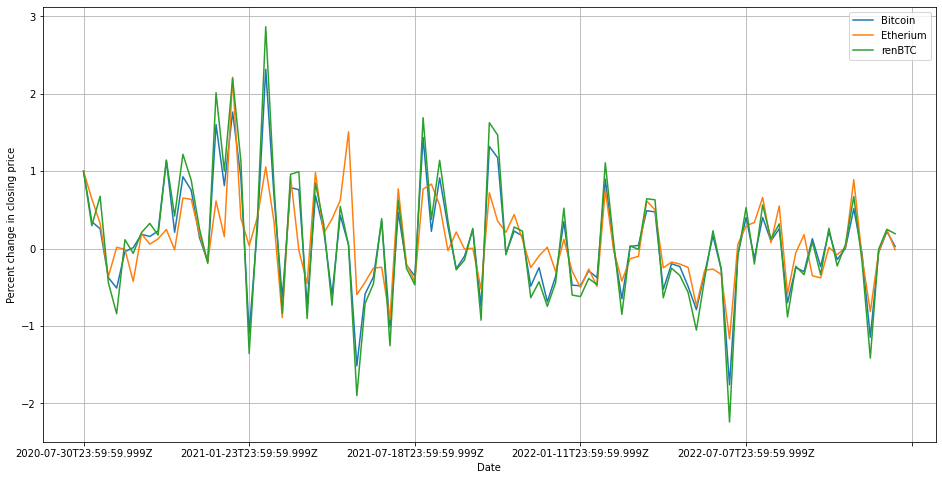

In [32]:
return_norm = return_df.divide(return_df.iloc[0])
return_norm.plot(figsize=(16,8), grid= True)
plt.xlabel('Date')
plt.ylabel('Percent change in closing price')

In [33]:
# For Comparative studies we merge the 5 files such that the Closing price of each Coin is indexed by the date
crypto= pd.DataFrame()

File = ['BitCoin','Etherium', 'renBTC']
for file in File:
    crypto[file] = pd.read_csv(file+'.csv', index_col = 'timeClose')['quote.close']
    
crypto.dropna(inplace=True)

crypto.head()

,BitCoin,Etherium,renBTC
timeClose,,,
2020-07-22T23:59:59.999Z,9525.363450,262.190656,9661.605248
2020-07-30T23:59:59.999Z,11111.214290,334.586629,10950.285828
2020-08-08T23:59:59.999Z,11754.045814,393.987376,11382.239039
2020-08-17T23:59:59.999Z,12254.401908,429.531252,12408.325707
2020-08-26T23:59:59.999Z,11488.363490,386.466124,11679.183008


Text(0, 0.5, 'Percent Change')

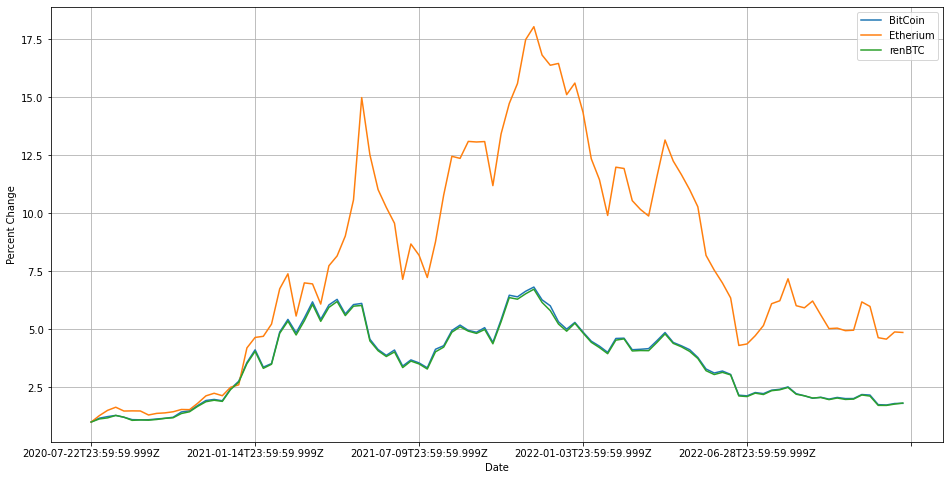

In [34]:


#To compare the relative performance of the coins, we divide the whole dataframe by the first row
crypto_norm = crypto.divide(crypto.iloc[0])

     

crypto_norm.plot(figsize = (16,8), grid = True)
plt.xlabel('Date')
plt.ylabel('Percent Change')
     


In [35]:
crypto_pct = crypto.pct_change().dropna()
crypto_pct.describe()

,BitCoin,Etherium,renBTC
count,99.000000,99.000000,99.000000
mean,0.011960,0.026029,0.012017
std,0.110962,0.145952,0.110571
min,-0.293309,-0.322746,-0.299097
25%,-0.055951,-0.069156,-0.058006
50%,0.004752,0.004132,0.011602
75%,0.063316,0.106518,0.071685
max,0.385958,0.611394,0.382573


<AxesSubplot:>

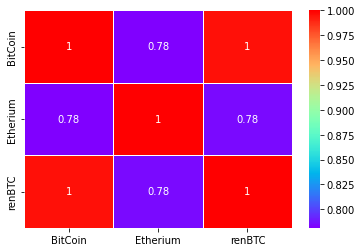

In [38]:
# Heatmap of correlation matrix of 3 cryptocurrencies
corr = crypto_pct.corr()
sns.heatmap(corr, cmap = 'rainbow', annot = True, linewidth = 1 )